<b><font size ="+2"><div style="text-align: right">FIT1043 Introduction to Data Science </div><font></b>
<b><font size ="+1"><div style="text-align: right">Assignment 1 </div><font></b>
<br>
<div style="text-align: right">Ng Wei Han</div>
<div style="text-align: right">30883490</div>
<hr>

# Introduction 
This assignment contains two different datasets which include data about ticket seating and ticket sales. The objective of this assignment is to extract useful and meaningful information from the datasets while providing business insights which can help in respective company's business model. Before the data analysis process, simple data cleaning and data understanding process are carried out. Data visualization tools are also used to help in visualizing insights in simple manner. 

# Importing Libraries
Import the necessary libraries to assist in data collection, data analysis and data visualization. The "magic function" matplotlib inline is also included to improve data visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Reading CSV Files
Using function *.read_csv()* from pandas library, dataframes are created for each CSV files.

In [2]:
df1 = pd.read_csv("FIT1043-ticket-seating.csv")
df2 = pd.read_csv("FIT1043-ticket-trx.csv")

# Description of CSV Files
Before doing data analysis, data understanding is carried out. This include knowing the size of the files and the columns available in the datasets. Functions such as *.shape*, *.columns* and *.describe()* have been used in this section.

## Ticket Seating Dataset 

In [3]:
df1.shape # Find number of rows and columns

(88477, 16)

There are **88477 columns** and **16 rows** in this dataset.

In [4]:
df1.columns # Find all columns 

Index(['Transaction.Number', 'Transaction.Sequence.Number', 'Cinema',
       'Session.Id', 'Session.Screening.Time', 'Session.Type',
       'Public.Screening', 'Seat.Allocation', 'Session.Status', 'Screen.Name',
       'Film', 'Seat.Number', 'Screen.Row.ID', 'Grid.Col.Id', 'Grid.Row.Id',
       'Layout'],
      dtype='object')

Summary of useful columns:

* *Transaction.Number* - Relates to a particular ticket sale 
* *Transaction.Sequence.Number* - Relates to the activity ID that the particular ticket is involved in 
* *Session.Screening.Time* - Shows the screening date and time of a film > session 
* *Film* - Relates to a movie 

In [5]:
df1['Film'].describe() # Describe data with basic statistics

count      88477
unique        30
top       Film 5
freq       36803
Name: Film, dtype: object

There are **30 unique** films in this dataset.

## Ticket Sales Dataset

In [6]:
df2.shape # Find number of rows and columns 

(88477, 35)

There are **88477 rows** and **35 columns** in this dataset.

In [7]:
df2.columns # Find all columns 

Index(['Transaction.Number', 'Transaction.Sequence.Number',
       'Transaction.Date.Time', 'Type.Of.Transaction', 'Film.Code',
       'Film.HO.Code', 'Ticket.Type', 'Ticket.Type.Code',
       'Ticket.Type.HO.Code', 'Ticket.Class', 'Price.Card', 'Sales.Tax',
       'Admits', 'Gross.Box.Office', 'Net.BoxOffice', 'Sales.Tax.1',
       'Sales.Tax.2', 'Gross.Box.Office.Each', 'Sales.Tax.1.Each',
       'Sales.Tax.2.Each', 'Gross.Each..excl..Redemp.',
       'Sales.Tax.1..excl..Redemp.', 'Sales.Tax.2..excl..Redemp.', 'User',
       'Workstation', 'Workstation.Desc', 'Workgroup.Desc', 'Report.Code',
       'Ticket.Num..numeric.', 'Ticket.Num..alpha.', 'POS.Session.ID',
       'Order.Time..Secs.', 'Sequence.Refunded', 'Ticket.Numbering.Style',
       'Full.Price'],
      dtype='object')

Summary of useful columns: 

* *Transaction.Number* - Relates to a particular ticket sale 
* *Transaction.Sequence.Number* - Relates to the activity ID that the particular ticket is involved in 
* *Transaction.Date.Time* - Relates to the data and time where a payment is made 
* *Type.Of.Transaction* - Relates to the type of transaction of a particular ticket sale
* *Film.Code* - Relates to an ID of the film 
* *Film.HO.Code* - Relates to long name of a movie which has been sanitized. Film.Code, Film.Ho.Code and Film are related. 
* *Ticket.Type* - Relates to the type of a particular ticket sale which includes price
* *Price.Card* - Relates to a particular movie ticket type 
* *Gross.Box.Office* - Relates to the full price of a ticket which includes taxes 
* *Net.Box.Office* - Relates to the price of a ticket which excludes taxes
* *User* - Relates to the worker ID 
* *Workstation* - Refers to the ID of cashier station
* *Order.Time..Secs.* - Relates to the time for a user to execute a transaction 

In [8]:
# Describe numerical data
df2[['Gross.Box.Office','Net.BoxOffice','Order.Time..Secs.','User']].describe() 

,Gross.Box.Office,Net.BoxOffice,Order.Time..Secs.
count,88477.000000,88477.000000,88477.000000
mean,8.484312,6.476065,54.096500
std,1.807816,1.379903,48.042458
min,-10.000000,-7.630000,0.000000
25%,9.000000,6.870000,29.000000
50%,9.000000,6.870000,47.000000
75%,9.000000,6.870000,71.000000
max,10.000000,7.630000,1246.000000


* Average revenue per movie ticket is 8.48
* Average profit earned per movie ticket is 6.47 
* Average order time for user is 54.09 seconds

In [9]:
# Describe categorical data
df2[['Type.Of.Transaction','Ticket.Type','Price.Card','User','Workstation']].describe()

,Type.Of.Transaction,Ticket.Type,Price.Card,User,Workstation
count,88477,88477,88477,88477,88477
unique,3,22,13,31,12
top,Ticket Sold,Standard $9.00,TBT - Std Blockbuster,User_09,POS18
freq,87442,59693,44204,14241,20836


* There are 22 unique ticket types 
* There are 13 unique price card
* There are 31 users 
* There are 12 cashier stations 
* Worker with ID User_09 has the most number of transactions 
* Workstation at POS18 has the most number of transactions

# Merging the dataframes 
The process of merging dataframes allows full insights of all the data regarding the movie tickets to be represented. To achieve that, function such as *.merge()* function from pandas library is used. 2 unique identifiers in both CSV files which are "Transaction.Number" and "Transaction.Sequence.Number" are identified to prevent duplicates. 

After merging the dataset, columns which are useful are selected to carry out the data analysis process later.

In [10]:
# Merge dataset
tickets = pd.merge(df1,df2,on = ['Transaction.Number','Transaction.Sequence.Number']) 

In [11]:
tickets.shape # Find number of rows and columns 

(88477, 49)

There are **88477 rows** and **49 columns** in merged dataframe.

In [12]:
# Extract useful columns 
tickets = tickets[['Transaction.Number',
                 'Transaction.Sequence.Number',
                 'Transaction.Date.Time',
                  'Type.Of.Transaction',
                  'Ticket.Type',
                  'Price.Card',
                  'Gross.Box.Office',
                  'Net.BoxOffice',
                  'User',
                  'Workstation',
                  'Order.Time..Secs.',
                  'Session.Screening.Time',
                  'Film']]

# Rename certain columns
tickets.rename(columns = {'Net.BoxOffice':'Net.Box.Office','Order.Time..Secs.':'Order.Time'},inplace = True )

# Business Insights
In this section, comparison between difference variables are carried out to find the correlation between these variables. From the result obtained, business can utilize the insights to execute operations and do change management accordingly. The insights are also visualized clearly using graphs such as bar chart and pie chart. 

## Movie with Highest Revenue 
**Objective**: Find which movie generated the highest revenue. 

**Columns Used**: Film, Gross.Box.Office 

**Steps of analysis**:

1. Used groupby function to group Film and find sum of revenue for each film
2. Sort valus based on revenue generated
3. Visualize the data using horizontal bar chart

In [13]:
# Group data by Film and find sum of revenue 
film_revenue = tickets.groupby('Film')['Gross.Box.Office'].agg('sum').reset_index()

In [14]:
# Sort values based on revenue generated
film_revenue.sort_values('Gross.Box.Office', inplace = True)
film_revenue.set_index('Film',inplace = True)

Text(0.5, 1.0, 'Total Revenue Generated Based on Film')

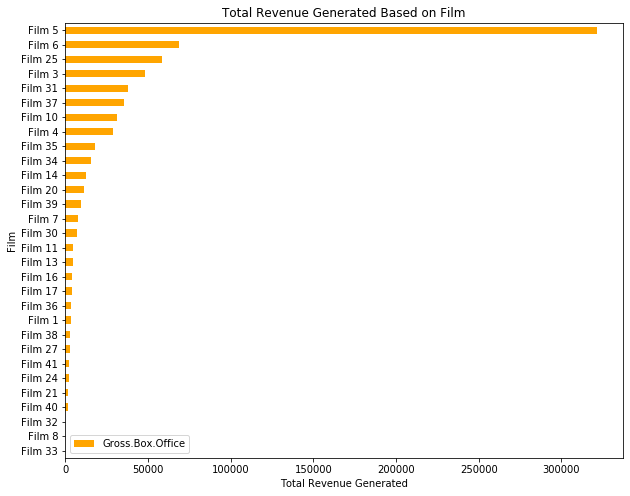

In [15]:
# Plot horizontal bar chart 
film_revenue.plot(kind = 'barh', color = 'orange', figsize = (10,8))
plt.ylabel('Film')
plt.xlabel('Total Revenue Generated')
plt.title('Total Revenue Generated Based on Film')

**Film 5** generated the **highest revenue**, while **Film 33** generated the **least amount of revenue**. This indicates that the cinema management can open more movie halls for Film 5. In contrast, cinema management should consider taking out Film 33 as it generate the least revenue. 

## Least Popular Day to Watch Movie
**Objective**: Find the least popular day in a week to watch movie

**Columns Used**: Type.Of.Transaction, Session.Screening.Time, Transaction.Number

**Steps of analysis**:

1. Create a copy of original dataframe (So that original dataframe can be used in other data analysis) 
2. Filter dataframe to obtain records which have 'Type.Of.Transaction' == 'Ticket Sold' 
3. Change 'Session.Screening.Time' to days of the week accordingly 
4. Find the number of movie session watched based on days of the week 
5. Sort the dataframe based on days of the week 
6. Visualize the data using horizontal bar chart and pie chart

In [16]:
# Create a new copy of dataframe
movie_tickets = tickets.copy(deep=True)

In [17]:
# Filter out refunded records
movie_tickets = movie_tickets.loc[movie_tickets['Type.Of.Transaction'] == 'Ticket Sold']

# Change 'Session.Screening.Time' values to days of the week
movie_tickets['Session.Screening.Time'] = pd.to_datetime(movie_tickets['Session.Screening.Time'])
movie_tickets['Session.Screening.Time'] = movie_tickets['Session.Screening.Time'].dt.day_name()

# Group by Session.Screening.Time and find count of sales for each day
movie_day = movie_tickets.groupby('Session.Screening.Time')['Transaction.Number'].count().reset_index()
movie_day.rename(columns = {'Transaction.Number':'Number of Sales','Session.Screening.Time':'Day'}, inplace = True)

In [18]:
# Sort dataframe based on days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
movie_day['Day'] = pd.Categorical(movie_day['Day'], categories=days, ordered=True)
movie_day = movie_day.sort_values('Day')
movie_day.set_index('Day',inplace = True)

Text(0.5, 1.0, 'Total Number of Movies Watched Based on Days')

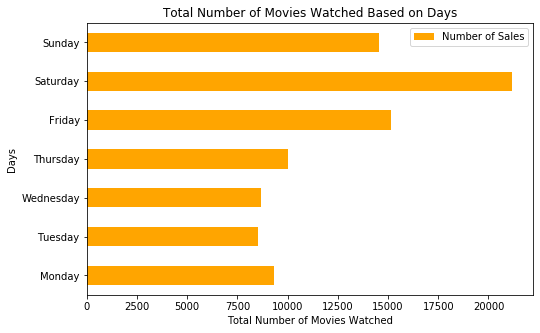

In [19]:
# Visualize the data using horizontal bar chart 
movie_day.plot(figsize = (8,5),kind='barh',color = 'orange')
plt.ylabel('Days')
plt.xlabel('Total Number of Movies Watched')
plt.title('Total Number of Movies Watched Based on Days')

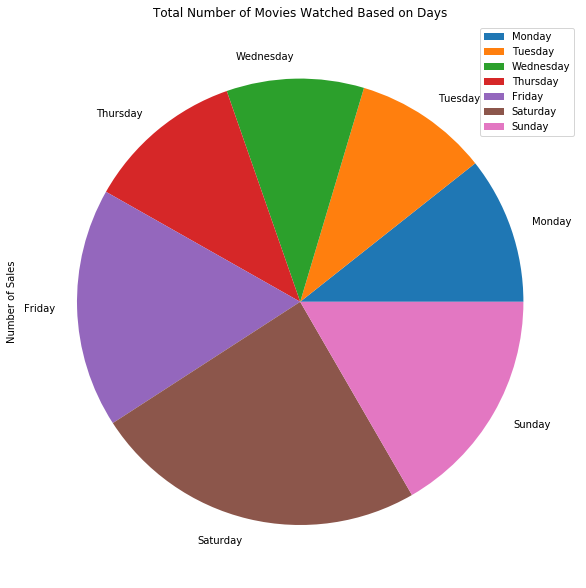

In [20]:
# Visualize the data using pie chart 
movie_day.reset_index()
movie_day.plot.pie(figsize = (10,15),subplots = True)
plt.title('Total Number of Movies Watched Based on Days')
plt.show()

Based on the above two diagrams, least popular day to watch a movie is **Tuesday**. On the other hand, the most popular day to watch a movie in on **Saturday**. Besides that, there is an obvious increasing pattern towards the end of the week. Friday, Saturday and Sunday have relatively higher number of sales as compared to other days. This means that majority of customers tend to watch movies towards the end of the week as compared to weekdays. 

## Most Popular Time of the Day
**Objective**: Find the most popular time of the day for movie goers

**Columns Used**: Type.Of.Transaction, Session.Screening.Time, Transaction.Number, Time Category

**Steps of analysis**: 

1. Import datetime library 
2. Create a copy of original dataframe
3. Filter out refunded records 
4. Create a new columns named 'Time Category' which consist of hour of screening time 
5. Group time period of the day accordingly
6. Groupby 'Time Category' and find the number of ticket sold 
7. Sort dataframe from 'Morning' till 'Midnight' 
8. Visualize data using bar chart

In [21]:
import datetime as dt

In [22]:
# Create a copy of original dataframe
time_tickets = tickets.copy(deep = True)

# Filter out refunded records
time_tickets = time_tickets.loc[time_tickets['Type.Of.Transaction'] == 'Ticket Sold']

# Change dtype of 'Session.Screening.Time' to datatime 
time_tickets['Session.Screening.Time'] = pd.to_datetime(time_tickets['Session.Screening.Time'])

In [23]:
# Insert new columns consists of hour of 'Session.Screening.Time'
time_tickets['Time Category'] = time_tickets['Session.Screening.Time'].dt.hour

In [24]:
# Group time period of the day accordingly
time_tickets.loc[((time_tickets['Session.Screening.Time'].dt.hour >= 6) & 
                  (time_tickets['Session.Screening.Time'].dt.hour < 12) ),'Time Category'] = 'Morning'
time_tickets.loc[((time_tickets['Session.Screening.Time'].dt.hour >= 12) & 
                  (time_tickets['Session.Screening.Time'].dt.hour < 15) ),'Time Category'] = 'Noon'
time_tickets.loc[((time_tickets['Session.Screening.Time'].dt.hour >= 15) & 
                  (time_tickets['Session.Screening.Time'].dt.hour < 18) ),'Time Category'] = 'Afternoon'
time_tickets.loc[((time_tickets['Session.Screening.Time'].dt.hour >= 18) & 
                  (time_tickets['Session.Screening.Time'].dt.hour < 21) ),'Time Category'] = 'Evening'
time_tickets.loc[((time_tickets['Session.Screening.Time'].dt.hour >= 21)),'Time Category'] = 'Night'
time_tickets.loc[((time_tickets['Session.Screening.Time'].dt.hour >= 0) & 
                  (time_tickets['Session.Screening.Time'].dt.hour < 6) ),'Time Category'] = 'Midnight'

In [25]:
# Groupby 'Time Category' and find number of sales for each time category
popular_time = time_tickets.groupby('Time Category')['Transaction.Number'].count().reset_index()
popular_time.rename(columns = {'Transaction.Number':'Number of Sales'},inplace = True)

In [26]:
# Sort dataframe from 'Morning' till 'Midnight'
time = ['Morning','Noon','Afternoon','Evening','Night','Midnight']
popular_time['Time Category'] = pd.Categorical(popular_time['Time Category'], categories=time, ordered=True)
popular_time = popular_time.sort_values('Time Category')
popular_time.set_index('Time Category', inplace = True)

Text(0.5, 1.0, 'Total Number of Tickets Sold Based on Time Category')

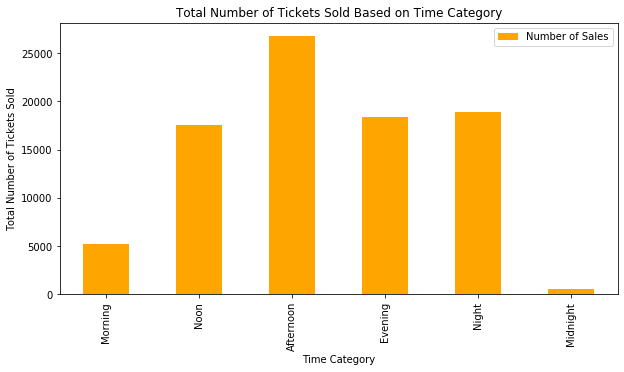

In [27]:
# Visualize data using bar chart 
popular_time.plot.bar(figsize = (10,5),color ='orange')
plt.xlabel('Time Category')
plt.ylabel('Total Number of Tickets Sold')
plt.title('Total Number of Tickets Sold Based on Time Category')

Based on the diagram above, we know that during the **afternoon (3pm - 6pm)** is the most popular time of the day for movie goers. Hence, more workers should be arranged to be on shift during this period of time. Besides that, we can utilize this insight to know that marketing promotion will be more effective during this period of time due to large amount of crowds. Furthermore, cinema management should allocate more movie halls and movie showcase time during this period of time. 

## Most Efficient Worker
**Objective**: Find the most efficient worker

**Columns Used**: Type.Of.Transaction, Order.Time, User

**Steps of analysis**: 

1. Filter out refunded records 
2. Groupby 'User' and find mean of order time for each user 
3. Remove 'User' named 'WEB' 
4. Visualize data using horizontal bar chart

In [28]:
# Filter out refunded records
tickets = tickets[tickets['Type.Of.Transaction'] == 'Ticket Sold']

# Groupby 'User' and find mean of order time for each user
order_time = tickets.groupby('User')['Order.Time'].mean().reset_index()
order_time.set_index('User', inplace = True)

# Remove 'User' named 'WEB'
order_time.drop(order_time.index[0],inplace = True )

Text(0.5, 1.0, 'Average Order Time of Every Worker')

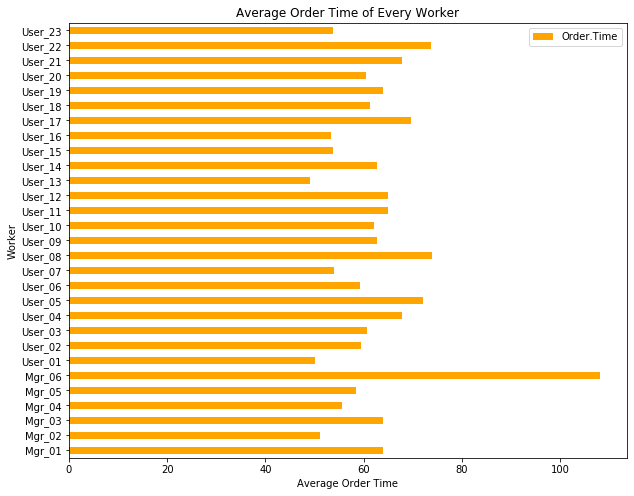

In [29]:
# Visualize data using horizontal bar chart
order_time.plot(figsize = (10,8),color ='orange',kind = 'barh')
plt.xlabel('Average Order Time')
plt.ylabel('Worker')
plt.title('Average Order Time of Every Worker')

Based on above diagram, the most efficient worker is **User_13** as the average order time is lowest among all. On the other hand, **Mgr_06** has the highest average order time which means this worker is the most inefficient among all workers. This data insight allows us to see which worker work the fastest to process each sales transactions, and cinema management can utilize this insight to allocate workers based on inefficiency (eg. less efficient worker can be put in charge in other department).  

## Most Strategic Cashier Station
**Objective**: Find the most strategic cashier station in the cinema 

**Columns Used**: Workstation, Transaction.Number 

**Steps of analysis**: 

1. Groupby 'Workstation' and find number of sales for each station
2. Visualize data using bar chart 

In [30]:
# Groupby 'Workstation' and find number of sales for each station
work_station = tickets.groupby('Workstation')['Transaction.Number'].count().reset_index()
work_station.rename(columns = {'Transaction.Number' : 'Number of Sales'}, inplace = True)
work_station.set_index('Workstation', inplace = True)

Text(0.5, 1.0, 'Total Number of Tickets Sold Based on Workstation')

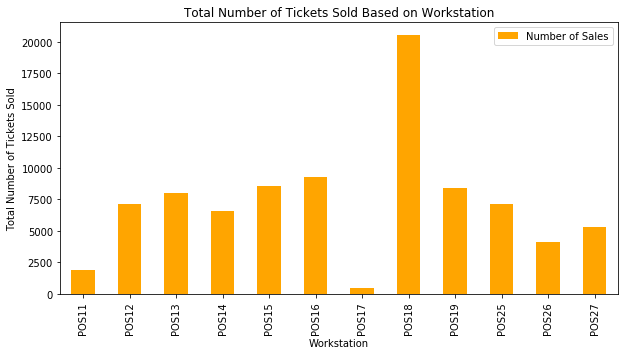

In [31]:
# Visualize data using bar chart
work_station.plot.bar(figsize = (10,5),color ='orange')
plt.xlabel('Workstation')
plt.ylabel('Total Number of Tickets Sold')
plt.title('Total Number of Tickets Sold Based on Workstation')

Based on the above diagram, I can deduce that **POS18** is the most strategic cashier station while **POS17** is the least strategic cashier station. This means that cashier POS17 can be closed by cinema management to reduce resource fees. Besides that, the location at POS18 can be used as a strategic marketing place, where marketing banners can put near the station to increase marketing awareness.

## Most Popular Day to Purchase Tickets
**Objective**: Find the most popular day to purchase tickets 

**Columns Used**: Transaction.Date.Time, Transaction.Number

**Steps of analysis**: 

1. Reuse the movie_tickets dataframe from analysis (Refer to section 6.2)
2. Change the 'Transaction.Date.Time' to days of the week
3. Groupby 'Transaction.Date.Time' and find number of sales for each day 
4. Sort the dataframe based on days of the week
5. Visualize the data using horizontal bar chart

In [32]:
# Change the 'Transaction.Date.Time' to days of the week
movie_tickets['Transaction.Date.Time'] = pd.to_datetime(movie_tickets['Transaction.Date.Time'])
movie_tickets['Transaction.Date.Time'] = movie_tickets['Transaction.Date.Time'].dt.day_name()

# Groupby 'Transaction.Date.Time' and find number of sales for each day 
purchase_day = movie_tickets.groupby('Transaction.Date.Time')['Transaction.Number'].count().reset_index()
purchase_day.rename(columns = {'Transaction.Number':'Number of Sales','Transaction.Date.Time':'Purchase Day'}, inplace = True)

In [33]:
# Sort the dataframe based on days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
purchase_day['Purchase Day'] = pd.Categorical(purchase_day['Purchase Day'], categories=days, ordered=True)
purchase_day = purchase_day.sort_values('Purchase Day')
purchase_day.set_index('Purchase Day',inplace = True)

Text(0.5, 1.0, 'Total Number of Tickets Sold Based on Purchase Days')

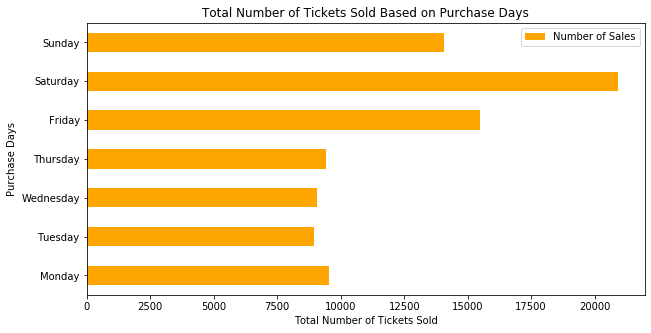

In [34]:
# Visualize the data using horizontal bar chart
purchase_day.plot(figsize = (10,5),kind='barh',color = 'orange')
plt.ylabel('Purchase Days')
plt.xlabel('Total Number of Tickets Sold')
plt.title('Total Number of Tickets Sold Based on Purchase Days')

Based on the above diagram, **Saturday** is the most popular day among customers to purchase the ticket. We can also see that towards the end of the week, the total number of tickets sold is higher than the other days. Comparing to the data insight of total number of movie session watched based on days, we can see that both graphs are similar. This could mean that majority of customers bought their tickets on the same day of movie session.

Using this insight, cinema management can come up with different marketing strategies. One of them can be promotion on less popular days such as Monday to Thursday. This strategy can boost up the sales for the unpopular days. Besides that, cinema management should allocate more workers to work during peak days especially on Saturday.

## Longest Order Time Based on Ticket Type
**Objective**: Find the ticket type which has the longest order time

**Columns Used**: Ticket.Type, Order.Time

**Steps of analysis**: 

1. Groupby 'Ticket.Type' and find the average order time for each ticket type
2. Visualize the data using horizontal bar chart

In [35]:
# Groupby 'Ticket.Type' and find the average order time for each ticket type 
type_order = tickets.groupby('Ticket.Type')['Order.Time'].agg('mean').reset_index() 
type_order.set_index('Ticket.Type',inplace = True) 
type_order.rename(columns = {'Order.Time':'Average Order Time'}, inplace = True)

Text(0.5, 1.0, 'Average Order Time Based on Ticket Type')

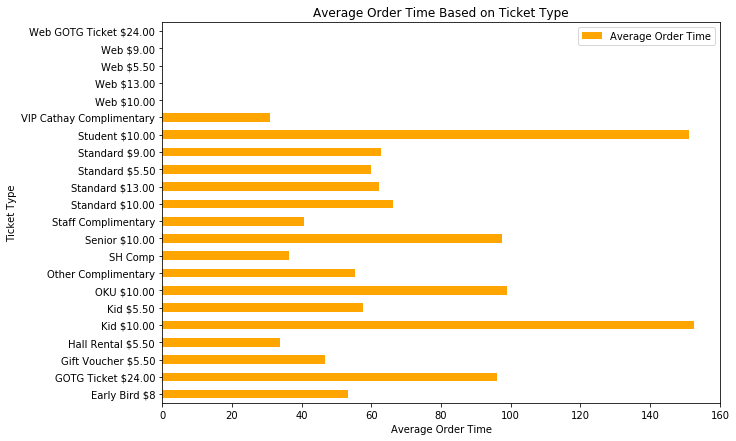

In [36]:
# Visualize the data using horizontal bar chart
type_order.plot(figsize = (10,7),kind='barh',color = 'orange')
plt.ylabel('Ticket Type')
plt.xlabel('Average Order Time')
plt.title('Average Order Time Based on Ticket Type')

Based on the above diagram, I would like to highlight **Student 10.00** and **Kid 10.00** as both of these ticket types have highest average order time. Using this insight, cinema management can open a cashier station specifically for these two ticket types so that other cashier stations can operate smoothly while reducing customer traffic.  

## Difference between Online Order and Offline Order

**Objective**: Find the difference between online orders and offline orders 

**Columns Used**: Ticket.Type, Transaction.Number

**Steps of analysis**:

1. Create a new column consisting of offline and online based on type of ticket 
2. Group the tickets by offline or online and find the number of tickets sold respectively 
3. Visualize data using pie chart

In [37]:
# Create a new column consisting of offline and online based on type of ticket
tickets['Online_Offline'] = tickets['Ticket.Type'].apply(lambda x: "Online" if "Web" in x else 'Offline')

In [38]:
# Group the tickets by offline or online and find the number of tickets sold respectively 
line_order = tickets.groupby('Online_Offline')['Transaction.Number'].count().reset_index()
line_order.rename(columns = {'Transaction.Number':'Number of Tickets Sold'}, inplace = True)

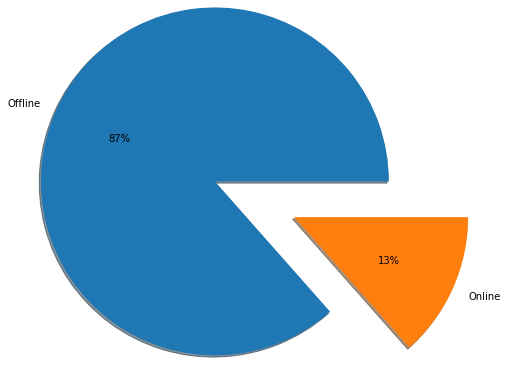

In [39]:
# Visualize the data using pie chart 
plt.pie(line_order['Number of Tickets Sold'], labels = line_order['Online_Offline'], radius = 2.0, autopct = "%0.0f%%", shadow = True, explode = [0,1])
plt.show()

Based on the pie chart above, there is significantly more people who bought offline tickets rather than online tickets. This signifies that online orders are not popular among the customers. To accommodate to this, cinema management can push for more offline tickets. This means that cinema management has to open up more physical counters, or even setting up automated ticket machines. 

However, offline tickets are generally more costly than online tickets. Therefore, cinema management can focus on building a better web system for the customers while offering online orders promotion so that customers are more likely to order tickets through online. This is much more cost effective and reduces the number of workers in the counters. 

# Conclusion

In conclusion, the business model of this cinema is highly diverse. This cinema also tend to target walk-in customers instead of online orders. This indicates more physical marketing opportunities should be done instead of digital ones. Besides that, this cinema is usually busy towards the end of the week. Therefore, more workers should be allocated in respective time slots to handle large customer traffic. Furthermore, movies that generated high amount of revenue should continue to be showcased so that more revenue can be generated. In order to further expand this business, cinema management team can look into marketing strategies based on target groups (eg. students) and external advertisements to generate higher revenue.